https://pandas.pydata.org/docs/user_guide/10min.html

In [15]:
import pandas as pd
import numpy as np
import typing
import string
import matplotlib.pyplot as plt

from wt_import import Wt_Importer


Set file for analysis

In [16]:
wt_full_sample = 'C:\\Users\\count\\dev\\pandas\\data\\PA_sample_data.csv'
wt_short_sample = 'C:\\Users\\count\\dev\\pandas\\data\\PA_sample_data_short.csv'
wt_micro_sample = "C:\\Users\\count\\dev\\pandas\\data\\PA_micro.csv"

df = Wt_Importer(wt_full_sample).df

Begin working with the dataframe:
- take a subset of the columns
- take phase 1 voltage and total reactive power

In [24]:
df_cols_1_2 = df[['U-1-Total','Q-SigmaA-Total']]
df_VQ = df_cols_1_2.rename(columns= {"U-1-Total":"V1","Q-SigmaA-Total":"Q_total"})
# df_VQ.head(3)

Extract Voltage Timeseries as numpy ndarray

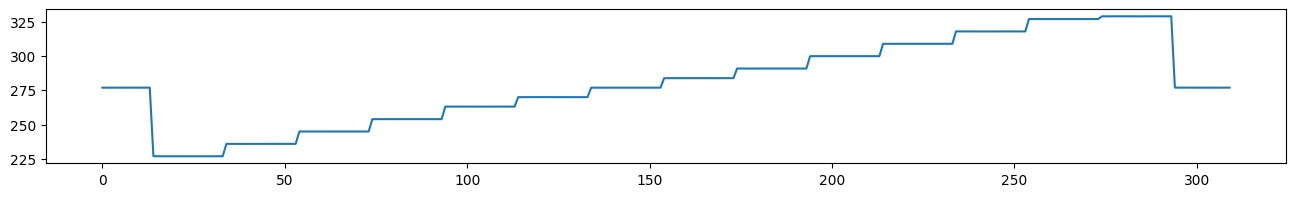

In [25]:
vs = df_VQ['V1'].to_numpy(dtype=float, copy=True)   # Voltage Timeseries

plt.figure(figsize=(16,2))
plt.plot(vs)

# Step finding
numpy.gradient()

<StemContainer object of 3 artists>

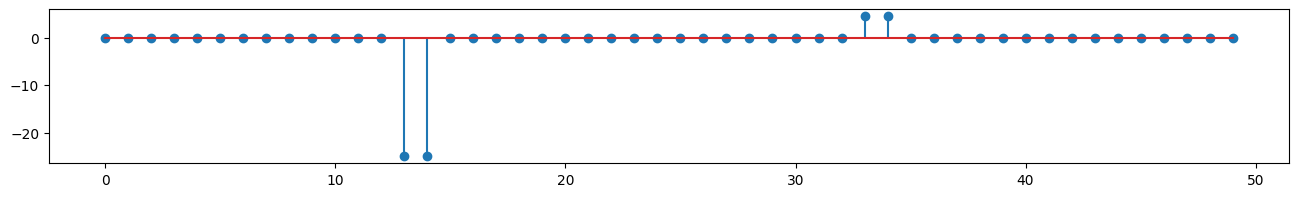

In [27]:
vgrad = np.gradient(vs)
plt.figure(figsize=(16,2))
plt.stem(vgrad[0:50])

numpy.diff()

<StemContainer object of 3 artists>

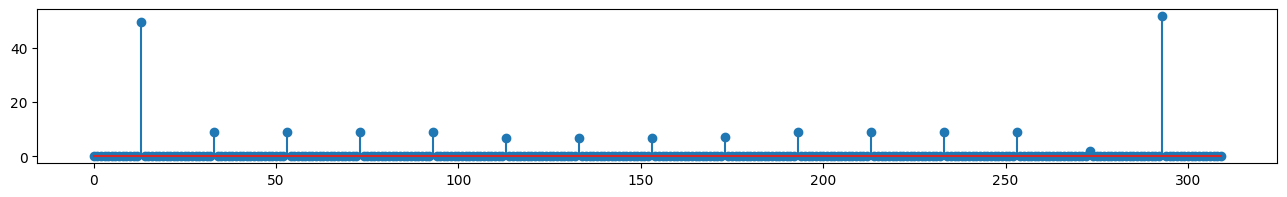

In [29]:
vdif = np.abs(np.diff(vs, append=vs[0] ))
plt.figure(figsize=(16,2))
plt.stem(vdif)
# plt.stem(vdif[0:20]) # first 20 samples of difference array

create binary array where steps are represented by boolean(1)

<StemContainer object of 3 artists>

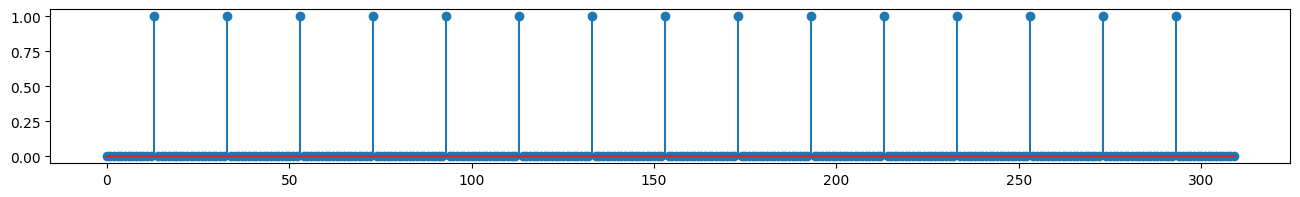

In [30]:
vbin = vdif > 1
plt.figure(figsize=(16,2))
plt.stem(vbin)

Get the index of each change point

In [32]:
change_locations = np.where(vbin)[0]
change_locations

array([ 13,  33,  53,  73,  93, 113, 133, 153, 173, 193, 213, 233, 253,
       273, 293], dtype=int64)

In [34]:
# import numpy_utils as utils
from Numpy_utils import plot_change_points
plot_change_points(vs,change_locations)

ImportError: cannot import name 'plot_change_points' from 'numpy_utils' (c:\Users\count\dev\pandas\numpy_utils.py)

In [ ]:
change_location5

In [ ]:
# range(len(change_location5))
